In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-transactions-dataset/Online Retail.xlsx
/kaggle/input/online-retail-transactions-dataset/Online Retail.csv


In [2]:
df = pd.read_csv('/kaggle/input/online-retail-transactions-dataset/Online Retail.csv')

In [3]:
print(df.head())
print(df.info())
print(df.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       ------------

In [4]:
print(df.isnull().sum())

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


In [5]:
df = df.dropna(subset=['CustomerID'])


In [6]:
df = df.drop_duplicates()

In [7]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


Feature 

In [8]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


Convert InvoiceDate to datetime

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


 Descriptive Statistics

In [10]:
print(df.describe())


            Quantity                    InvoiceDate      UnitPrice  \
count  524878.000000                         524878  524878.000000   
mean       10.616600  2011-07-04 15:30:16.317049088       3.922573   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         1.000000            2011-03-28 12:13:00       1.250000   
50%         4.000000            2011-07-20 11:22:00       2.080000   
75%        11.000000            2011-10-19 11:41:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   13541.330000   
std       156.280031                            NaN      36.093028   

          CustomerID     TotalPrice  
count  524878.000000  524878.000000  
mean    15287.631345      20.275399  
min     12346.000000       0.001000  
25%     14375.000000       3.900000  
50%     15287.000000       9.920000  
75%     16245.000000      17.700000  
max     18287.000000  168469.600000  
std      1482.145530     271.693566  


In [12]:
monthly_sales = df.resample('ME', on='InvoiceDate').sum()['TotalPrice']


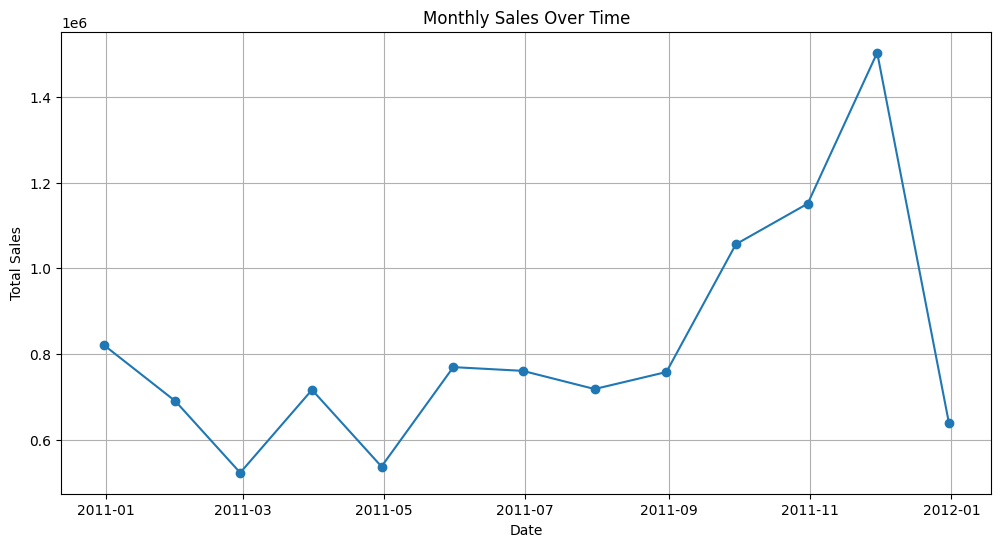

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

Top products by quantity sold

In [14]:
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)


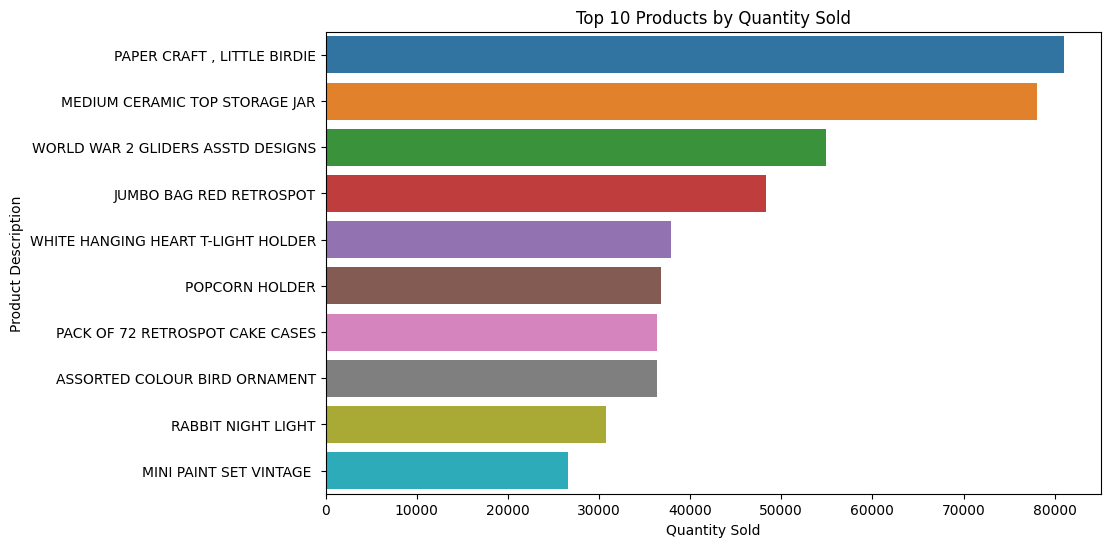

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

In [16]:
country_counts = df['Country'].value_counts().nlargest(10)

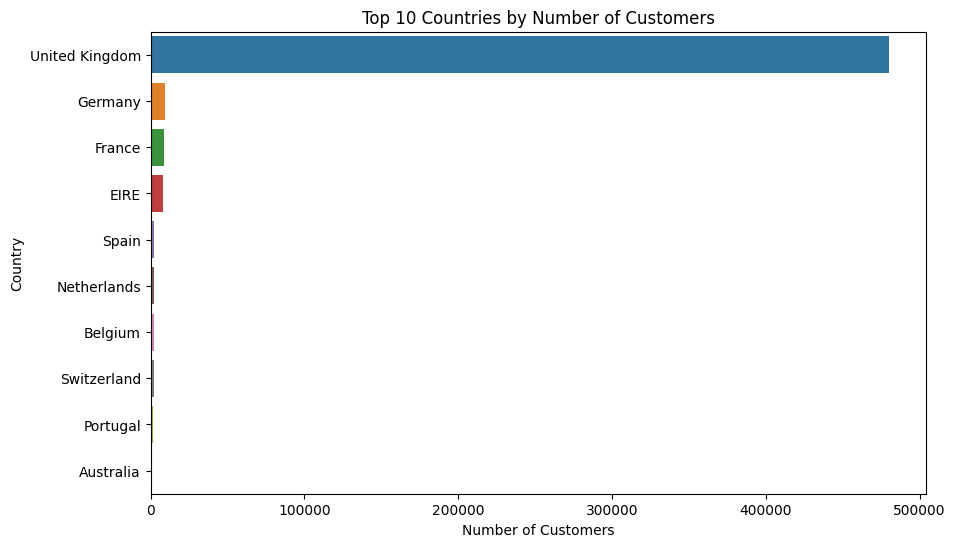

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

In [18]:
revenue_per_product = df.groupby('Description')['TotalPrice'].sum().nlargest(10)


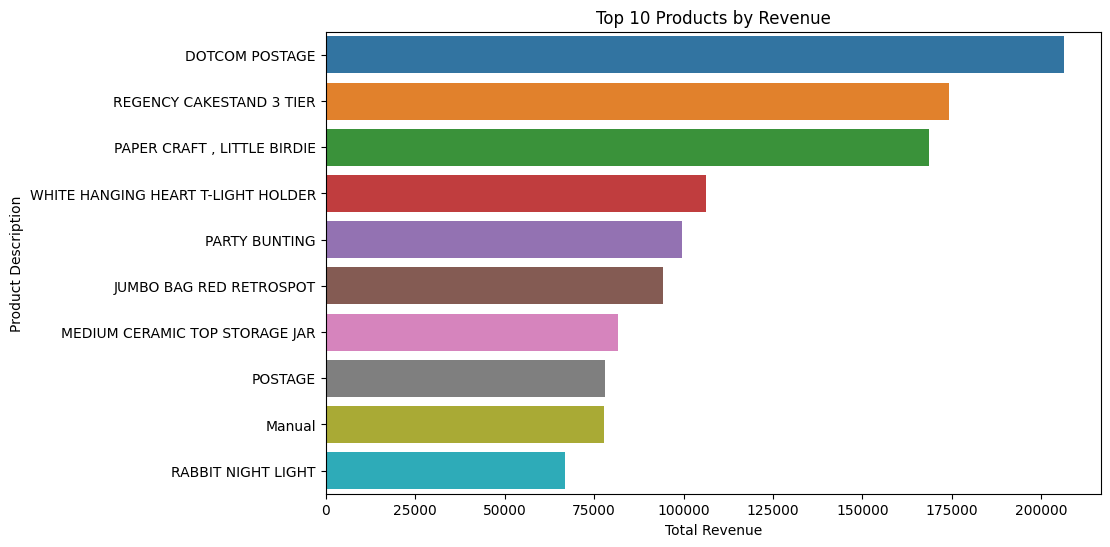

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_per_product.values, y=revenue_per_product.index)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.show()


In [23]:
product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

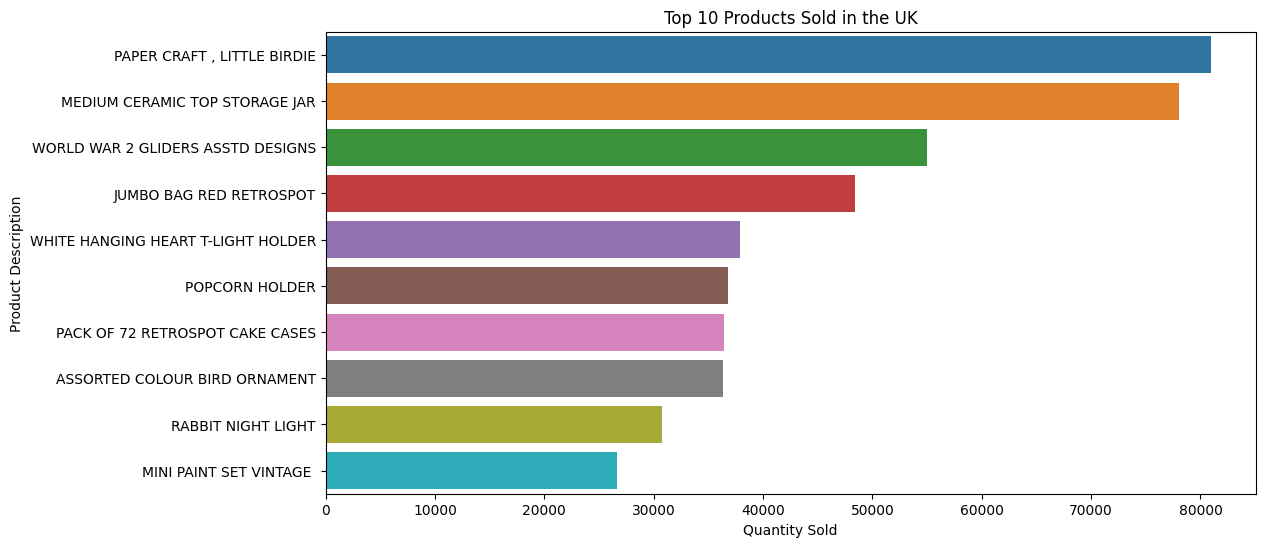

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.values[:10], y=product_sales.index[:10])
plt.title('Top 10 Products Sold in the UK')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

In [25]:
revenue_per_product = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)


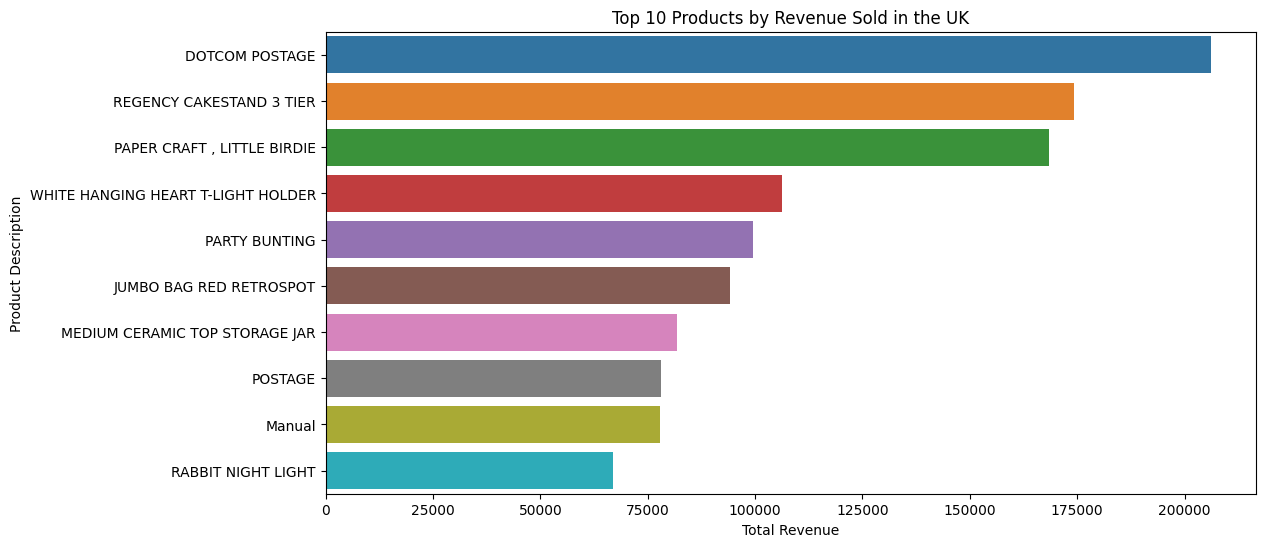

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_per_product.values[:10], y=revenue_per_product.index[:10])
plt.title('Top 10 Products by Revenue Sold in the UK')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.show()

In [29]:
monthly_sales = df.resample('ME', on='InvoiceDate').sum()['TotalPrice']


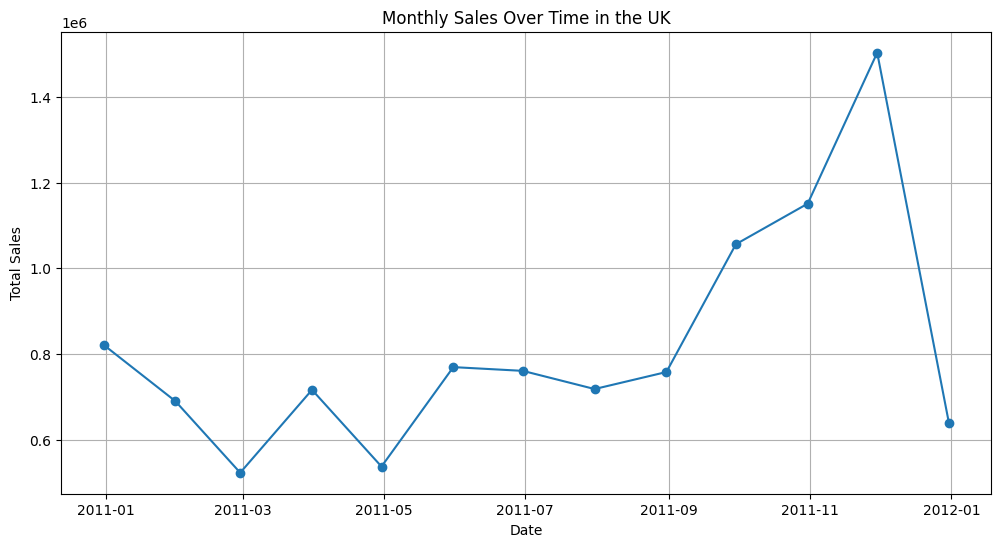

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Over Time in the UK')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

In [39]:
uk_data = df[df['Country'] == 'United Kingdom'].copy()

In [40]:
uk_data.loc[:, 'InvoiceMonth'] = uk_data['InvoiceDate'].dt.to_period('M')

In [41]:
purchase_pivot_monthly = uk_data.pivot_table(index='Description', columns='InvoiceMonth', values='Quantity', aggfunc='sum', fill_value=0)
print(purchase_pivot_monthly.head())

InvoiceMonth                   2010-12  2011-01  2011-02  2011-03  2011-04  \
Description                                                                  
4 PURPLE FLOCK DINNER CANDLES       16        2        1        0        7   
50'S CHRISTMAS GIFT BAG LARGE        0        0        0        0        0   
DOLLY GIRL BEAKER                    0        0        0        0        0   
I LOVE LONDON MINI BACKPACK          0        0        0        0        0   
NINE DRAWER OFFICE TIDY              0        0        0        0        0   

InvoiceMonth                   2011-05  2011-06  2011-07  2011-08  2011-09  \
Description                                                                  
4 PURPLE FLOCK DINNER CANDLES        3        2        3        1        9   
50'S CHRISTMAS GIFT BAG LARGE        0        0        0       14      271   
DOLLY GIRL BEAKER                    0        0       58      234      153   
I LOVE LONDON MINI BACKPACK          0        0        0       

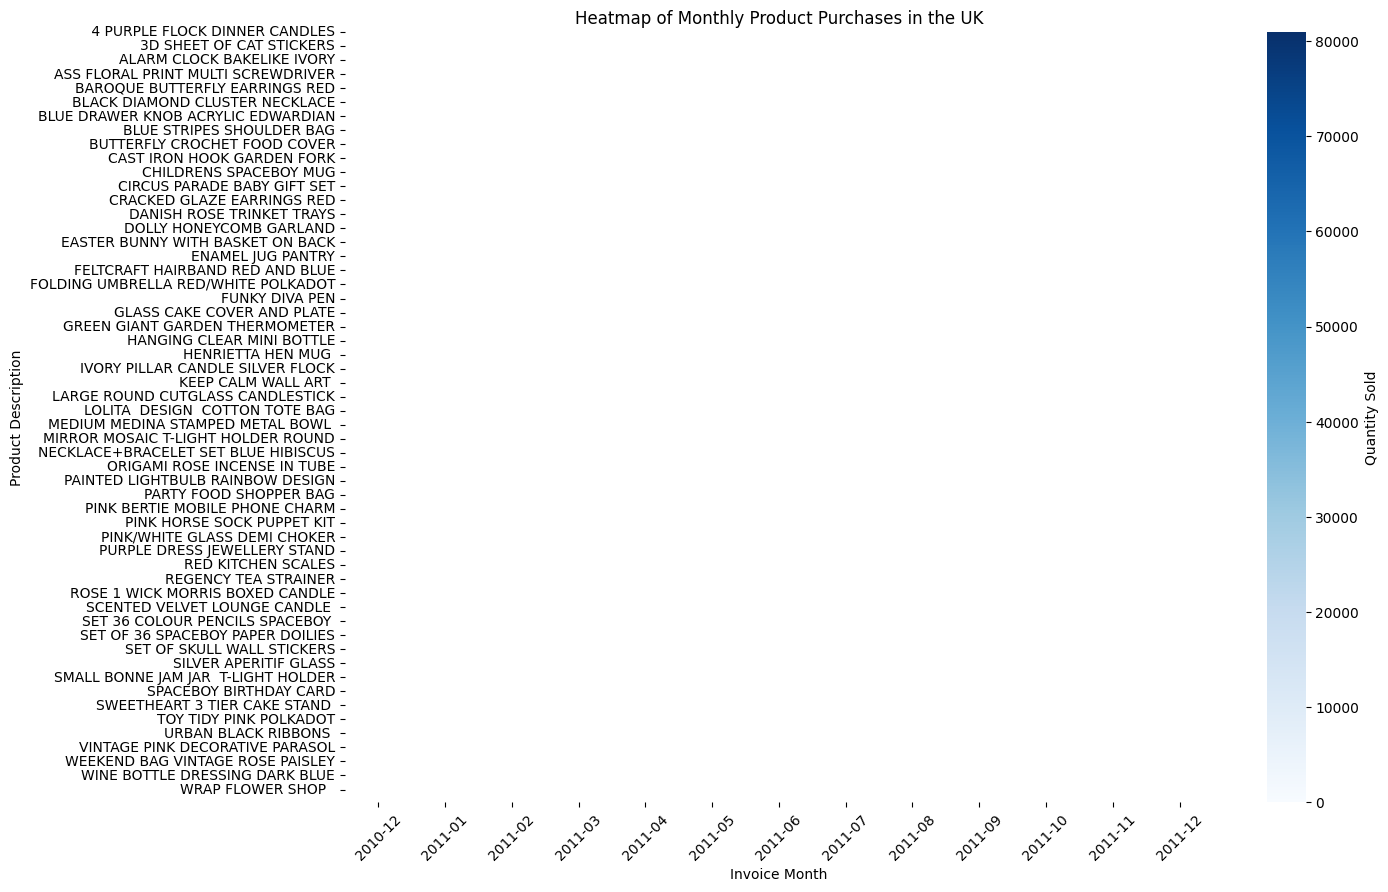

In [42]:
plt.figure(figsize=(14, 10))
sns.heatmap(purchase_pivot_monthly, cmap='Blues', cbar_kws={'label': 'Quantity Sold'}, linewidths=0.5)
plt.title('Heatmap of Monthly Product Purchases in the UK')
plt.xlabel('Invoice Month')
plt.ylabel('Product Description')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()